<a href="https://colab.research.google.com/github/vpolkampally0125/aaru/blob/main/Newton's_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import util as util
from linear_model import LinearModel

In [12]:
ds1_training_set_path = 'data/ds1_train.csv'
ds1_valid_set_path = 'data/ds1_valid.csv'
ds2_training_set_path = 'data/ds2_train.csv'
ds2_valid_set_path = 'data/ds2_valid.csv'

In [13]:
x_train, y_train = util.load_dataset(ds1_training_set_path, add_intercept=True)
x_valid, y_valid = util.load_dataset(ds1_valid_set_path, add_intercept=True)

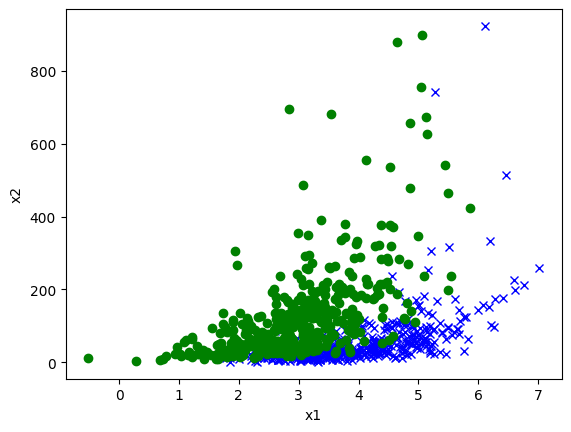

In [14]:
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x_train[y_train == 1, -2], x_train[y_train == 1, -1], 'bx', linewidth=2)
plt.plot(x_train[y_train == 0, -2], x_train[y_train == 0, -1], 'go', linewidth=2)

In [15]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        def h(theta, x):
            return 1 / (1 + np.exp(-np.dot(x, theta)))

        def gradient(theta, x, y):
          m,_ = x.shape
          return -1/m * np.dot(x.T, y - h(theta, x))

        def hessian(theta, x):
          m, _ = x.shape
          h_theta_x = np.reshape(h(theta, x), (-1, 1))
          return 1 / m * np.dot(x.T, h_theta_x * (1 - h_theta_x) * x)

        def next_theta(theta, x, y):
          return theta - np.dot(np.linalg.inv(hessian(theta, x)), gradient(theta, x, y))

        m,n = x.shape
        if self.theta is None:
          self.theta = np.zeros(n)

        old_theta = self.theta
        new_theta = next_theta(self.theta, x, y)
        while np.linalg.norm(new_theta - old_theta, 1) >= self.eps:
            old_theta = new_theta
            new_theta = next_theta(old_theta, x, y)

        self.theta = new_theta



    def predict(self, x):
      return x @ self.theta >= 0

In [16]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

Theta is:  [-6.26018491  2.47707251 -0.0299125 ]
The accuracy on training set is:  0.8825


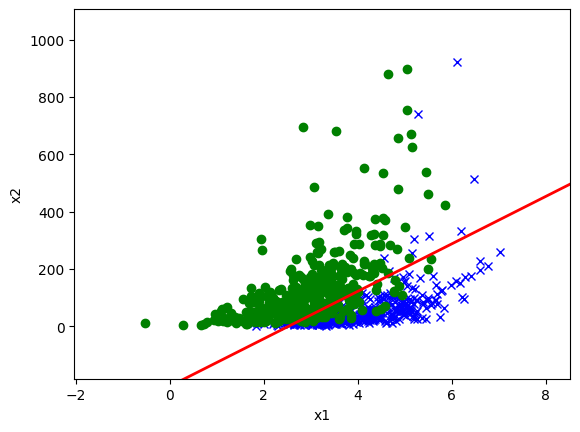

In [17]:
util.plot(x_train, y_train, theta=log_reg.theta)
print("Theta is: ", log_reg.theta)
print("The accuracy on training set is: ", np.mean(log_reg.predict(x_train) == y_train))

The accuracy on validation set is:  0.9


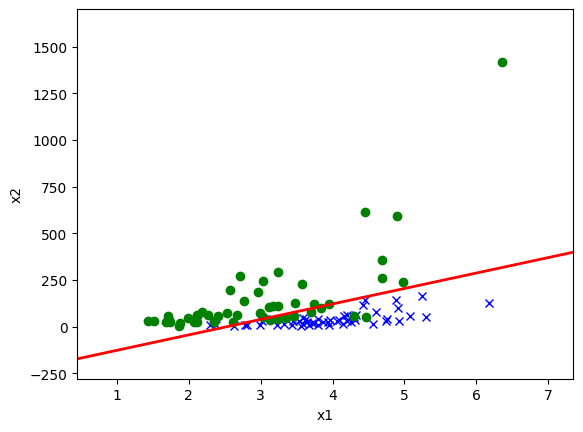

In [18]:
util.plot(x_valid, y_valid, log_reg.theta)
print("The accuracy on validation set is: ", np.mean(log_reg.predict(x_valid) == y_valid))